In [24]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Obtaining data

Lik for dataset explanation by Fowler: http://fowler.ucsd.edu/judicial.htm

In [3]:
url = "http://jhfowler.ucsd.edu/data/judicial.csv"

df = pd.read_csv(
    url
)

df.head(3)

,caseid,usid,parties,year,overruled,overruling,oxford,liihc,indeg,outdeg,hub,hubrank,auth,authrank,between,incent
0,1,1US1,NaN,1754,0,0,0,0,0,0,0.0,20250,0.0,20945,0.0,0.0
1,2,1US2,NaN,1759,0,0,0,0,0,0,0.0,20250,0.0,20945,0.0,0.0
2,3,1US3,NaN,1760,0,0,0,0,0,0,0.0,20250,0.0,20945,0.0,0.0


## Checking distribution of Hub rank and scores

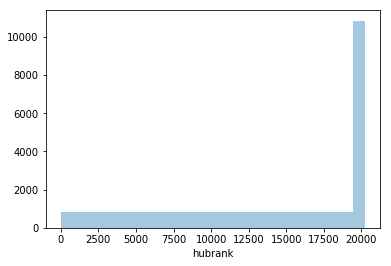

In [5]:
sns.distplot(
    df.hubrank,
    kde=False
)

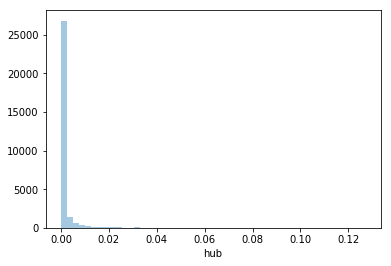

In [6]:
sns.distplot(
    df.hub,
    kde=False
)

In [15]:
df.hub.value_counts().sort_index().iloc[np.r_[0:5, -5:0]]

0.000000    10039
0.000001        4
0.000001        4
0.000001       12
0.000001       16
0.107687        1
0.109481        1
0.109871        1
0.109919        1
0.127095        1
Name: hub, dtype: int64

## Authority

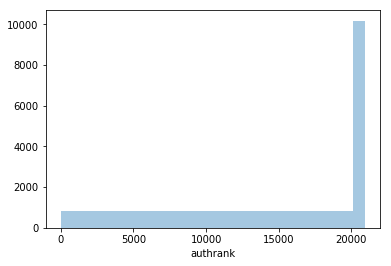

In [8]:
sns.distplot(
    df.authrank,
    kde=False
)

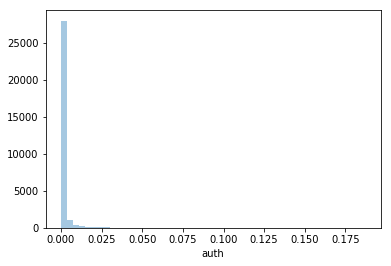

In [9]:
sns.distplot(
    df.auth,
    kde=False
)

In [13]:
df.auth.value_counts().sort_index().iloc[np.r_[0:4, -4:0]]

0.000000    9344
0.000001       5
0.000001       7
0.000001      10
0.150170       1
0.152705       1
0.159180       1
0.187172       1
Name: auth, dtype: int64

In [20]:
df.authrank.value_counts().sort_index().iloc[np.r_[0:4, -4:0]]

1           1
2           1
3           1
4           1
20923      10
20933       7
20940       5
20945    9344
Name: authrank, dtype: int64

In [22]:
df.shape

(30288, 17)

# Testing Logit

In [17]:
df.head(3)

,caseid,usid,parties,year,overruled,overruling,oxford,liihc,indeg,outdeg,hub,hubrank,auth,authrank,between,incent
0,1,1US1,NaN,1754,0,0,0,0,0,0,0.0,20250,0.0,20945,0.0,0.0
1,2,1US2,NaN,1759,0,0,0,0,0,0,0.0,20250,0.0,20945,0.0,0.0
2,3,1US3,NaN,1760,0,0,0,0,0,0,0.0,20250,0.0,20945,0.0,0.0


## Creating column that defines citation of either Legal Rank

In [19]:
df['cited_rank'] = df[['oxford', 'liihc']].max(axis=1)

## Creating percentile column

Creating new rank for percentile to replicate method used

In [25]:
for c in df[['auth', 'hub']].columns:
    df[c + '_quantile'] = scipy.stats.rankdata(df[c], method='max')*100/df.shape[0]

## Defining columns

In [27]:
X = df[['auth_quantile', 'hub_quantile']]

X = sm.add_constant(X)

y = df.cited_rank

/home/joseluiz/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
reg = sm.Logit(y, X).fit()

print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.086152
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             cited_rank   No. Observations:                30288
Model:                          Logit   Df Residuals:                    30285
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 May 2019   Pseudo R-squ.:                  0.3297
Time:                        12:09:37   Log-Likelihood:                -2609.4
converged:                       True   LL-Null:                       -3892.9
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.6717      0.338    -37.519      0.000     -13.334     -12.010
auth_quantile     0